# HomeWork 6: Putting it all togather

# Dataset : Default credit card client

-This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

## import necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## EDA

In [2]:
credit_df = pd.read_csv("C:\\Users\MOM\Desktop\Data Scince\Aman sir\Machine Learning\\UCI_Credit_Card.csv")
credit_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
# First column which names ID, that stands for ID of each client, does not reflect any useful information about the data.
credit_df.drop('ID',axis=1, inplace = True) 

In [5]:
credit_df.shape

(30000, 24)

In [6]:
#Looking for the description of the dataset to get insights of the data
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


* ***This Dataset contains 30000 lines and 24 columns.*** 
* ***default payment next month is our target variable we need to focus on this***


## PreProcessing

In [7]:
credit_df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [8]:
#rename the column default.payment.next.month as 'DEFAULT_PYMENT'
credit_df.rename(columns={'default.payment.next.month': 'DEFAULT_PYMENT'}, inplace=True)

In [9]:
credit_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PYMENT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<Axes: xlabel='DEFAULT_PYMENT', ylabel='count'>

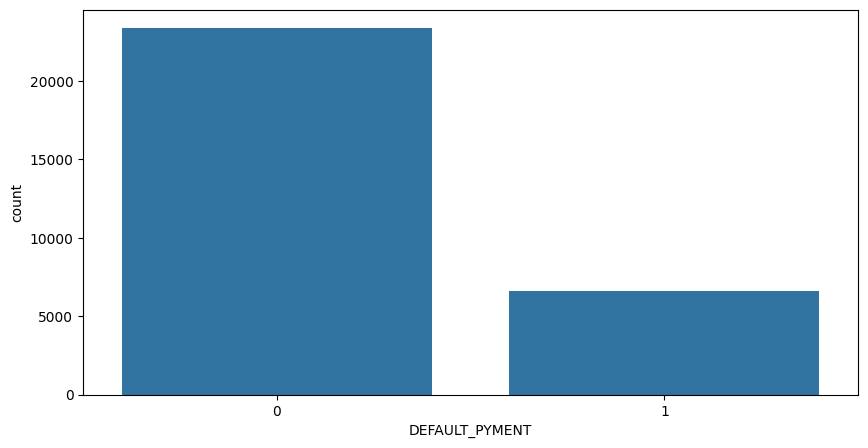

In [10]:
##plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'DEFAULT_PYMENT', data = credit_df)

**From the above data analysis we can say that**
*   **0 - Not Default**
*   **1 - Default**
*   **Defaulters are less than the Non Defaulters in the given dataset.**

### Education

In [11]:
# counts the education  data set variable data set
credit_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

***'EDUCATION' column: notice 5 and 6 are both recorded as 'unknown' and there is 0 which isn't explained in the dataset description. Since the amounts are so small, let's combine 0,4,5,6 to 0 which means"other'.***

In [12]:
# Change values 4, 5, 6 to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others

credit_df["EDUCATION"] = credit_df["EDUCATION"].replace({4:0,5:0,6:0})
credit_df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

<Axes: xlabel='EDUCATION', ylabel='count'>

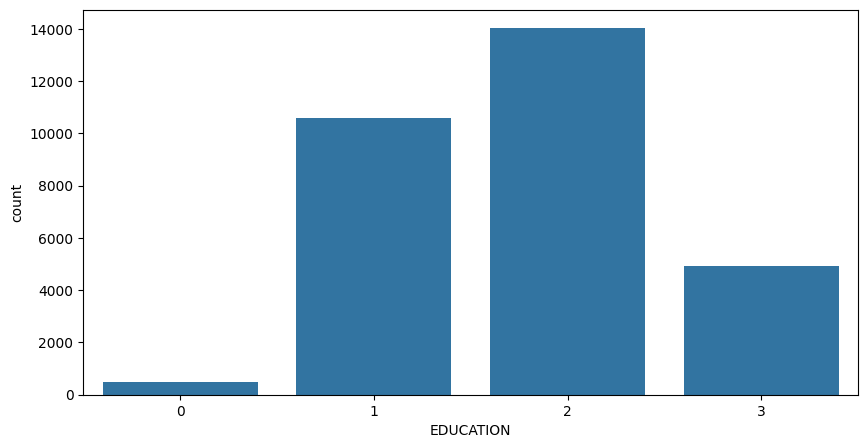

In [13]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'EDUCATION', data = credit_df)

### sex

In [14]:
# counts the SEX variable data set
credit_df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

<Axes: xlabel='SEX', ylabel='count'>

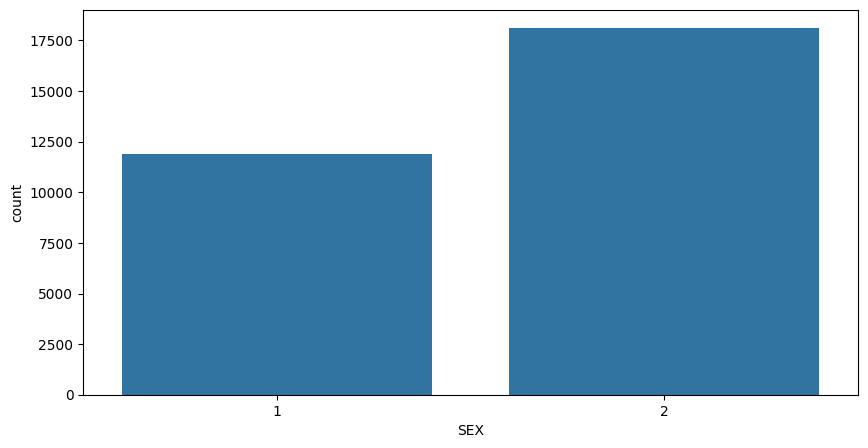

In [15]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'SEX', data = credit_df)

**From the above data analysis we can say that**
*   **1 - Male**
*   **2 - Female**
*   ***Number of Male credit holder is less than Female.***

# **Marriage**


**1 = married; 2 = single; 3 = others**

In [16]:
# From dataset description: MARRIAGE: Marital status (1=married, 2=single, 3=others), but there is also 0

credit_df["MARRIAGE"].unique()

array([1, 2, 3, 0], dtype=int64)

In [17]:
# counts the education  data set
credit_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [18]:
credit_df["MARRIAGE"] = credit_df["MARRIAGE"].replace({0:3})
credit_df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

<Axes: xlabel='MARRIAGE', ylabel='count'>

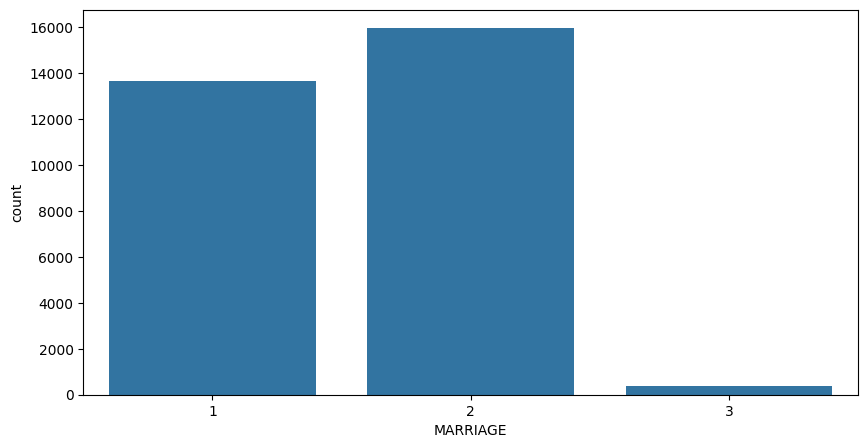

In [19]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'MARRIAGE', data = credit_df)

**From the above data analysis we can say that**
*   ***More number of credit cards holder are Single.***

### **AGE**

In [20]:
# counts the education  data set
credit_df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

In [21]:
#check the mean of the age group rescpective to the default_payment_next_month
credit_df.groupby('DEFAULT_PYMENT')['AGE'].mean()

DEFAULT_PYMENT
0    35.417266
1    35.725738
Name: AGE, dtype: float64

In [22]:
credit_df = credit_df.astype('int')

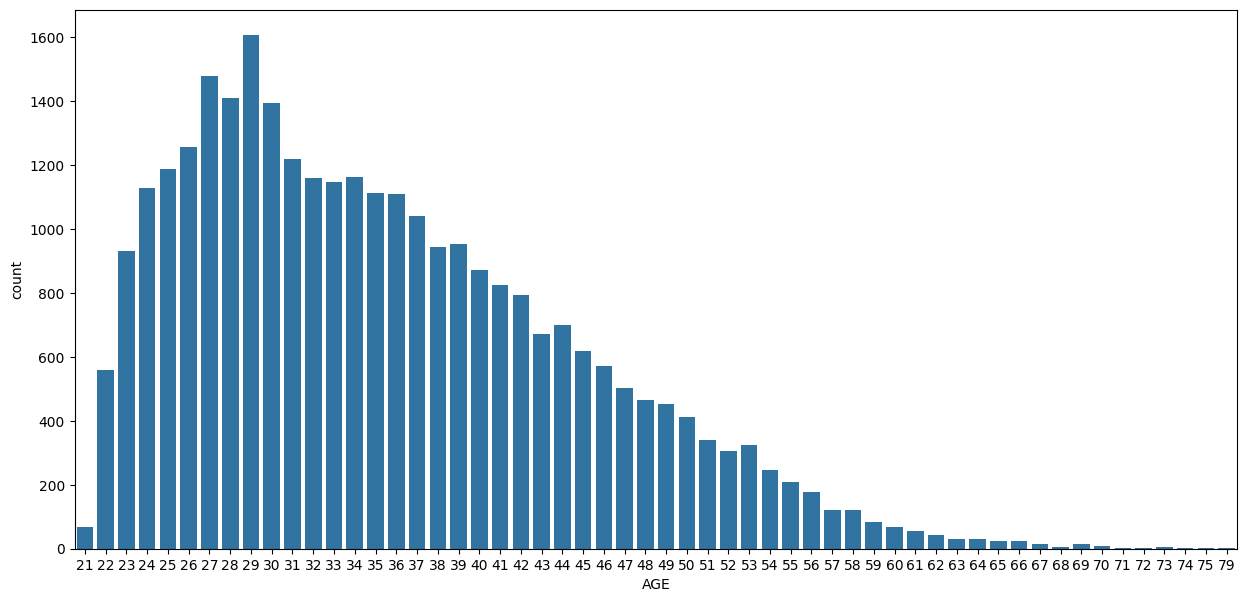

In [23]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(15,7))
sns.countplot(x = 'AGE', data = credit_df)
plt.show()

**From the above data analysis we can say that**
*  ***We can see more number of credit cards holder age are between 26-30 years old.***
*  ***Age above 60 years old rarely uses the credit card.***

In [24]:
#renaming columns 

credit_df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
credit_df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
credit_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [25]:
#check details about the data set
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   LIMIT_BAL       30000 non-null  int32
 1   SEX             30000 non-null  int32
 2   EDUCATION       30000 non-null  int32
 3   MARRIAGE        30000 non-null  int32
 4   AGE             30000 non-null  int32
 5   PAY_SEPT        30000 non-null  int32
 6   PAY_AUG         30000 non-null  int32
 7   PAY_JUL         30000 non-null  int32
 8   PAY_JUN         30000 non-null  int32
 9   PAY_MAY         30000 non-null  int32
 10  PAY_APR         30000 non-null  int32
 11  BILL_AMT_SEPT   30000 non-null  int32
 12  BILL_AMT_AUG    30000 non-null  int32
 13  BILL_AMT_JUL    30000 non-null  int32
 14  BILL_AMT_JUN    30000 non-null  int32
 15  BILL_AMT_MAY    30000 non-null  int32
 16  BILL_AMT_APR    30000 non-null  int32
 17  PAY_AMT_SEPT    30000 non-null  int32
 18  PAY_AMT_AUG     30000 non-

In [26]:
#assign the bill amount variable to a single variable 
total_bill_amnt_df = credit_df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']]

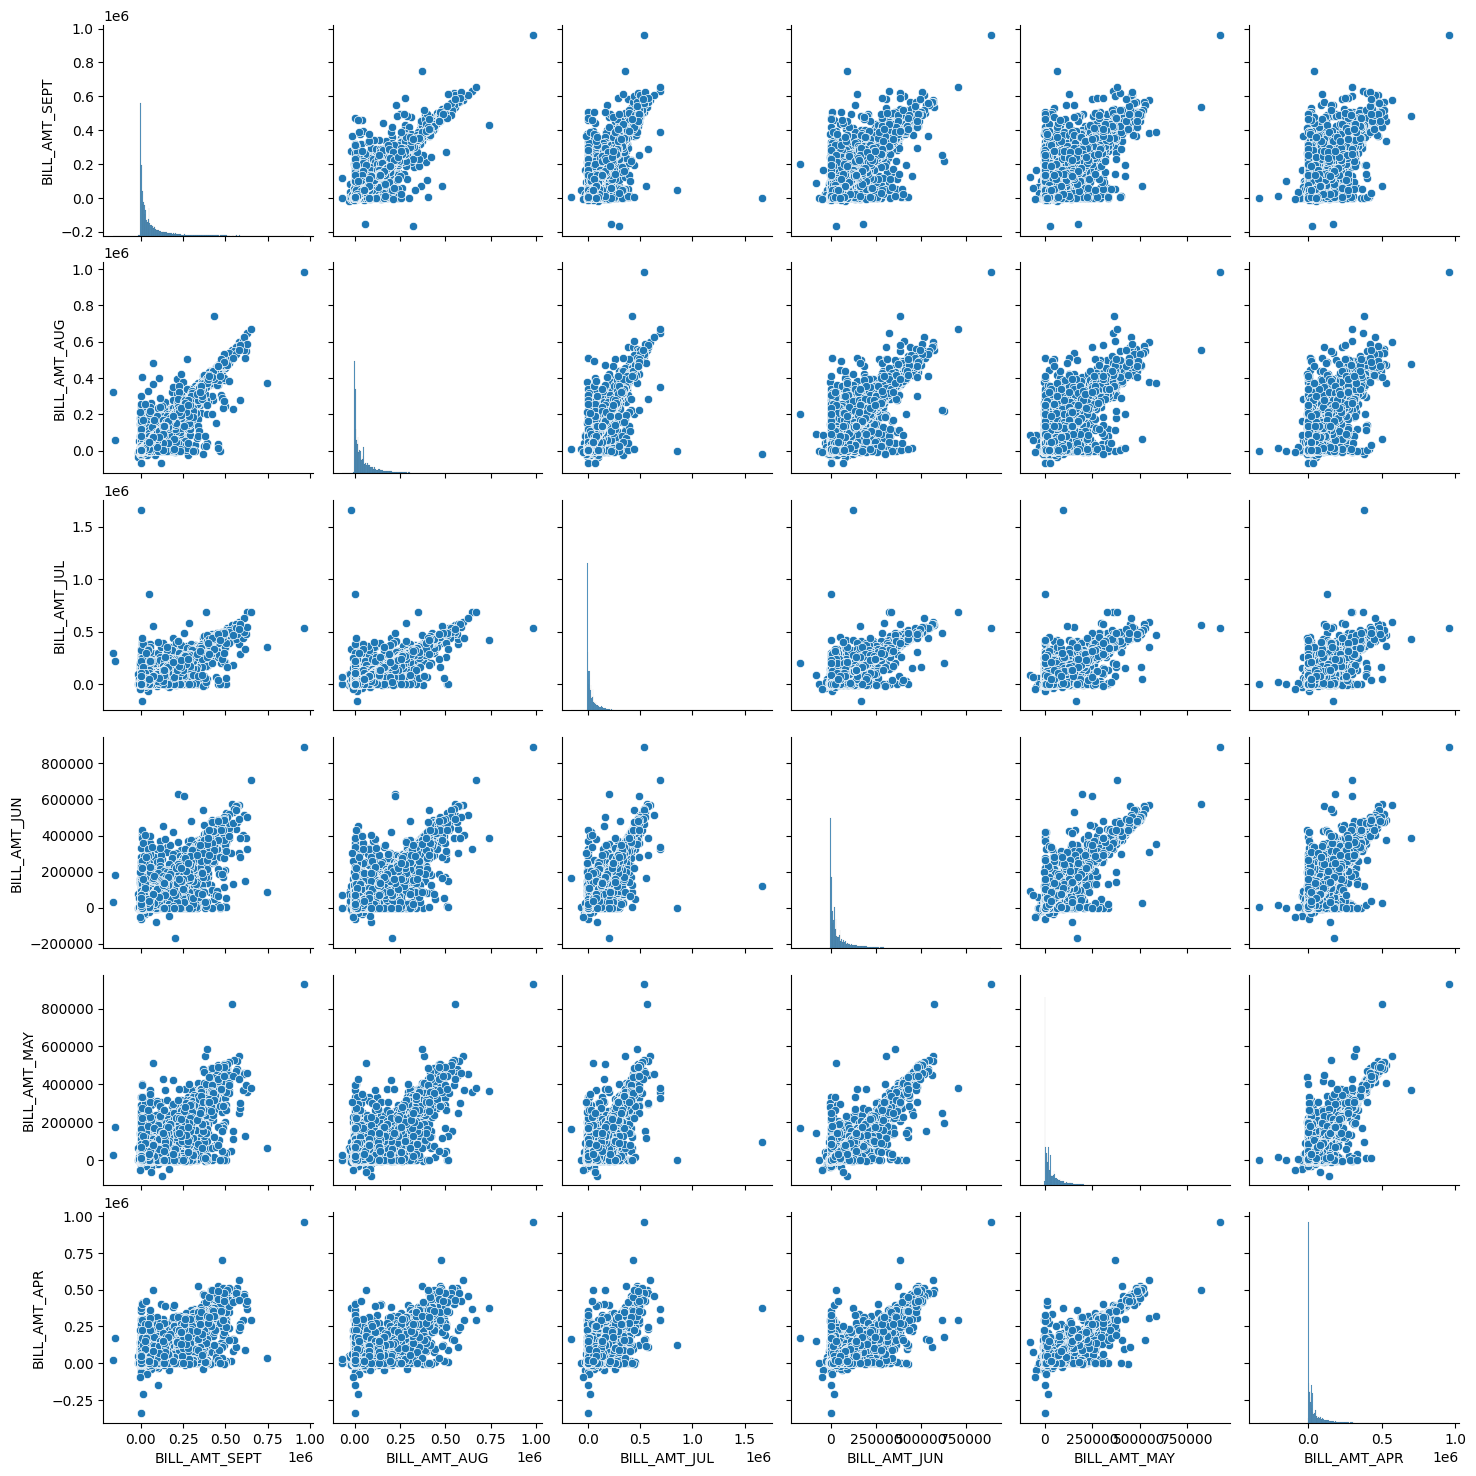

In [27]:
#plotting the pair plot for bill amount 
sns.pairplot(data = total_bill_amnt_df)

### **Previous payment status**

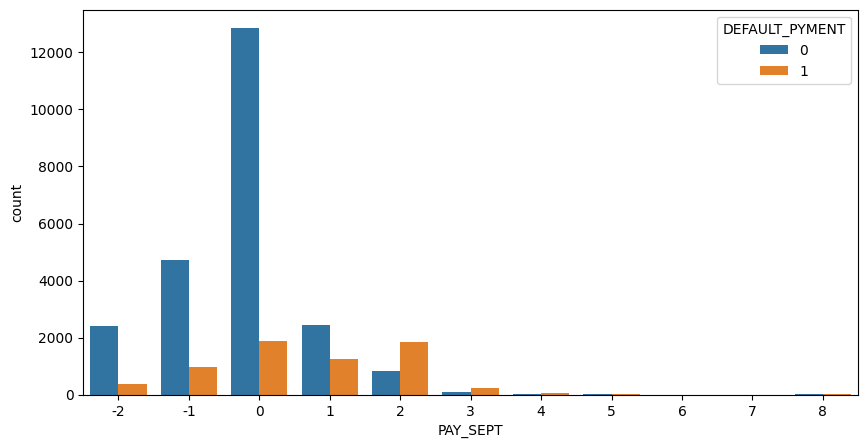

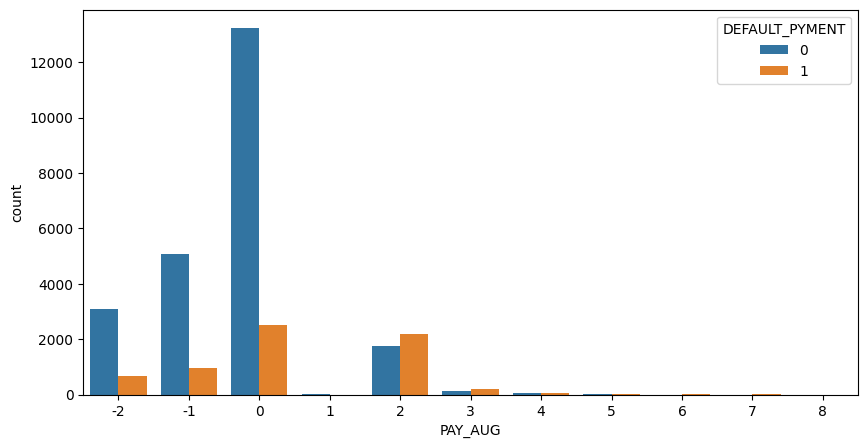

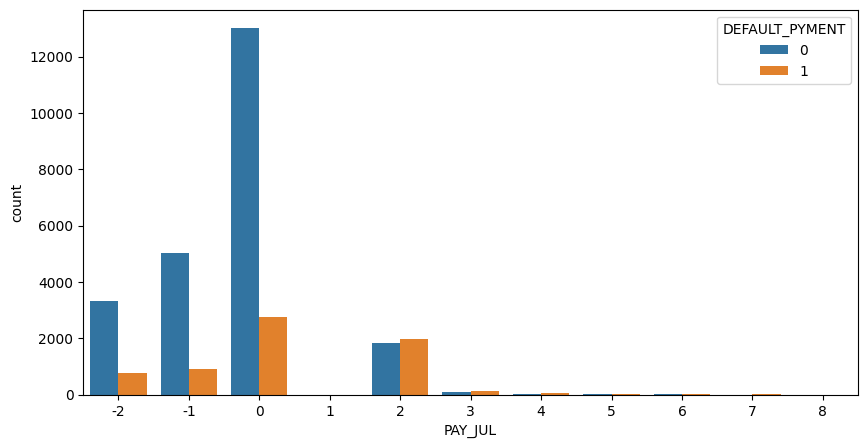

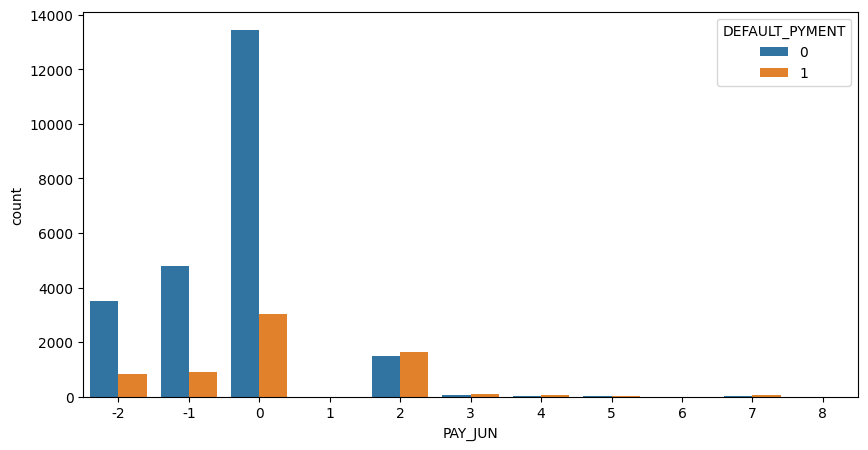

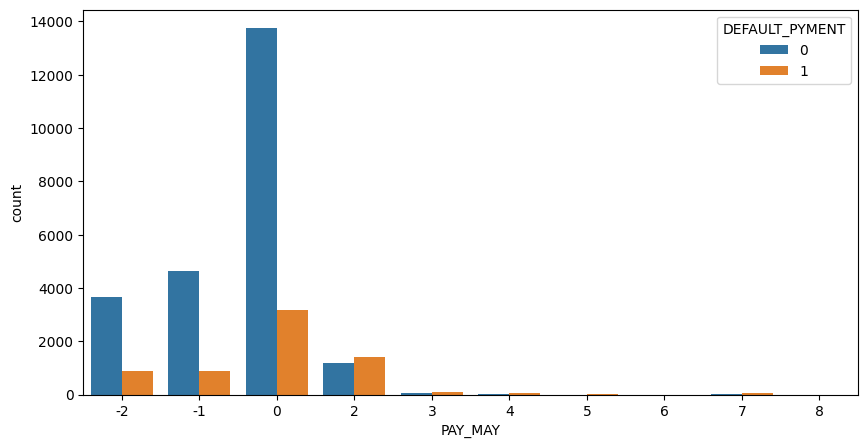

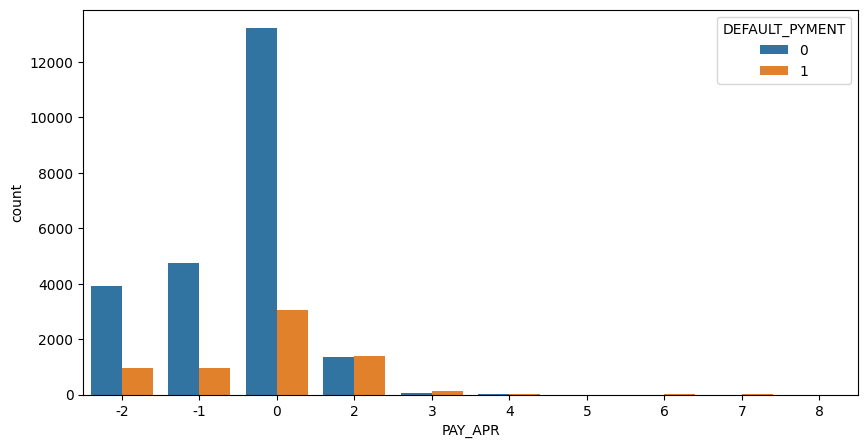

In [28]:
#plotting the count plot for Previous payment status
pre_payment = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
for col in pre_payment:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'DEFAULT_PYMENT', data = credit_df)

### **Paid Amount**

In [29]:
#assign the Paid Amount variable to a single variable 
pay_amnt_df = credit_df[['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR','DEFAULT_PYMENT']]

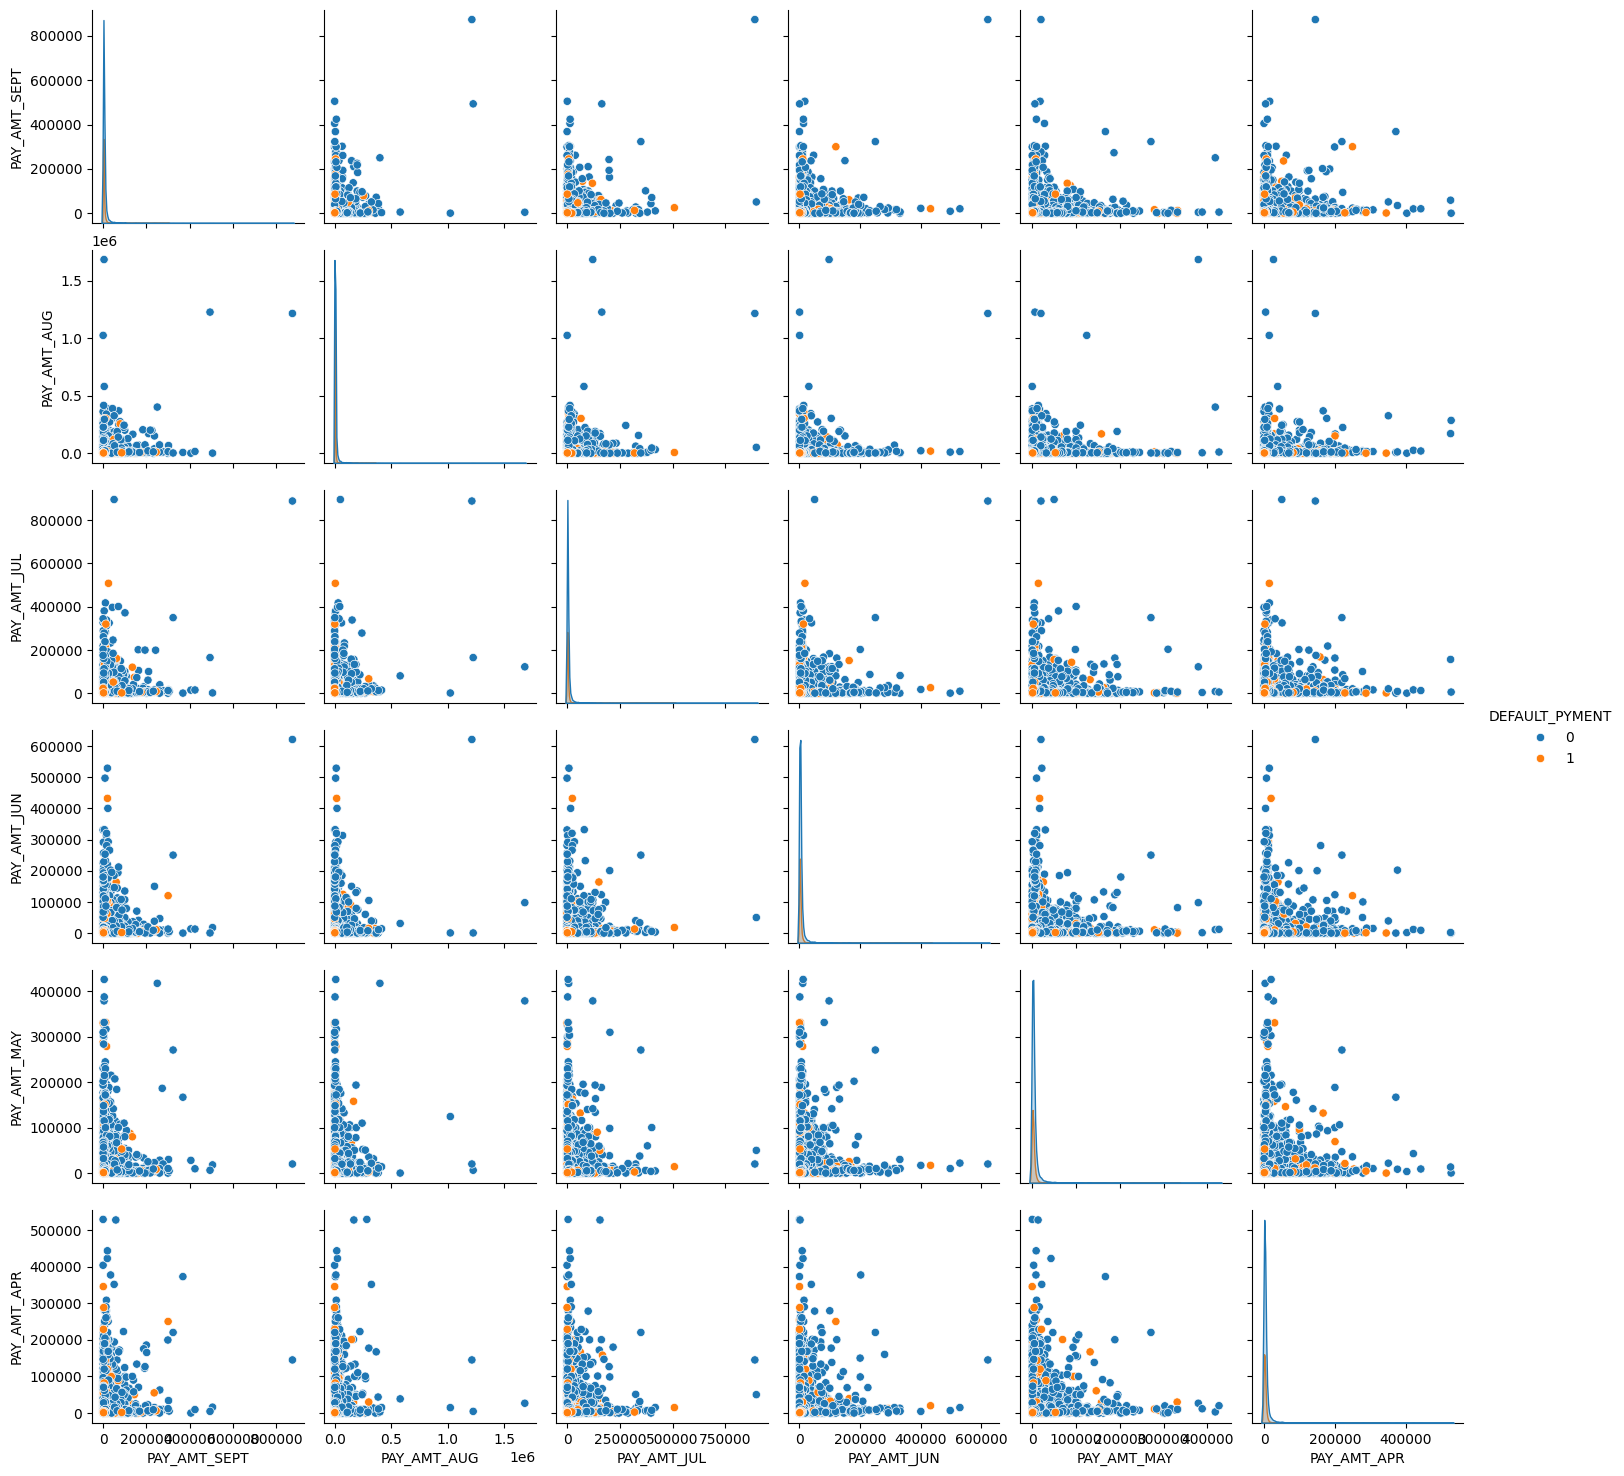

In [30]:
#plotting the pair plot for paid amount
sns.pairplot(data = pay_amnt_df, hue='DEFAULT_PYMENT')

<Axes: >

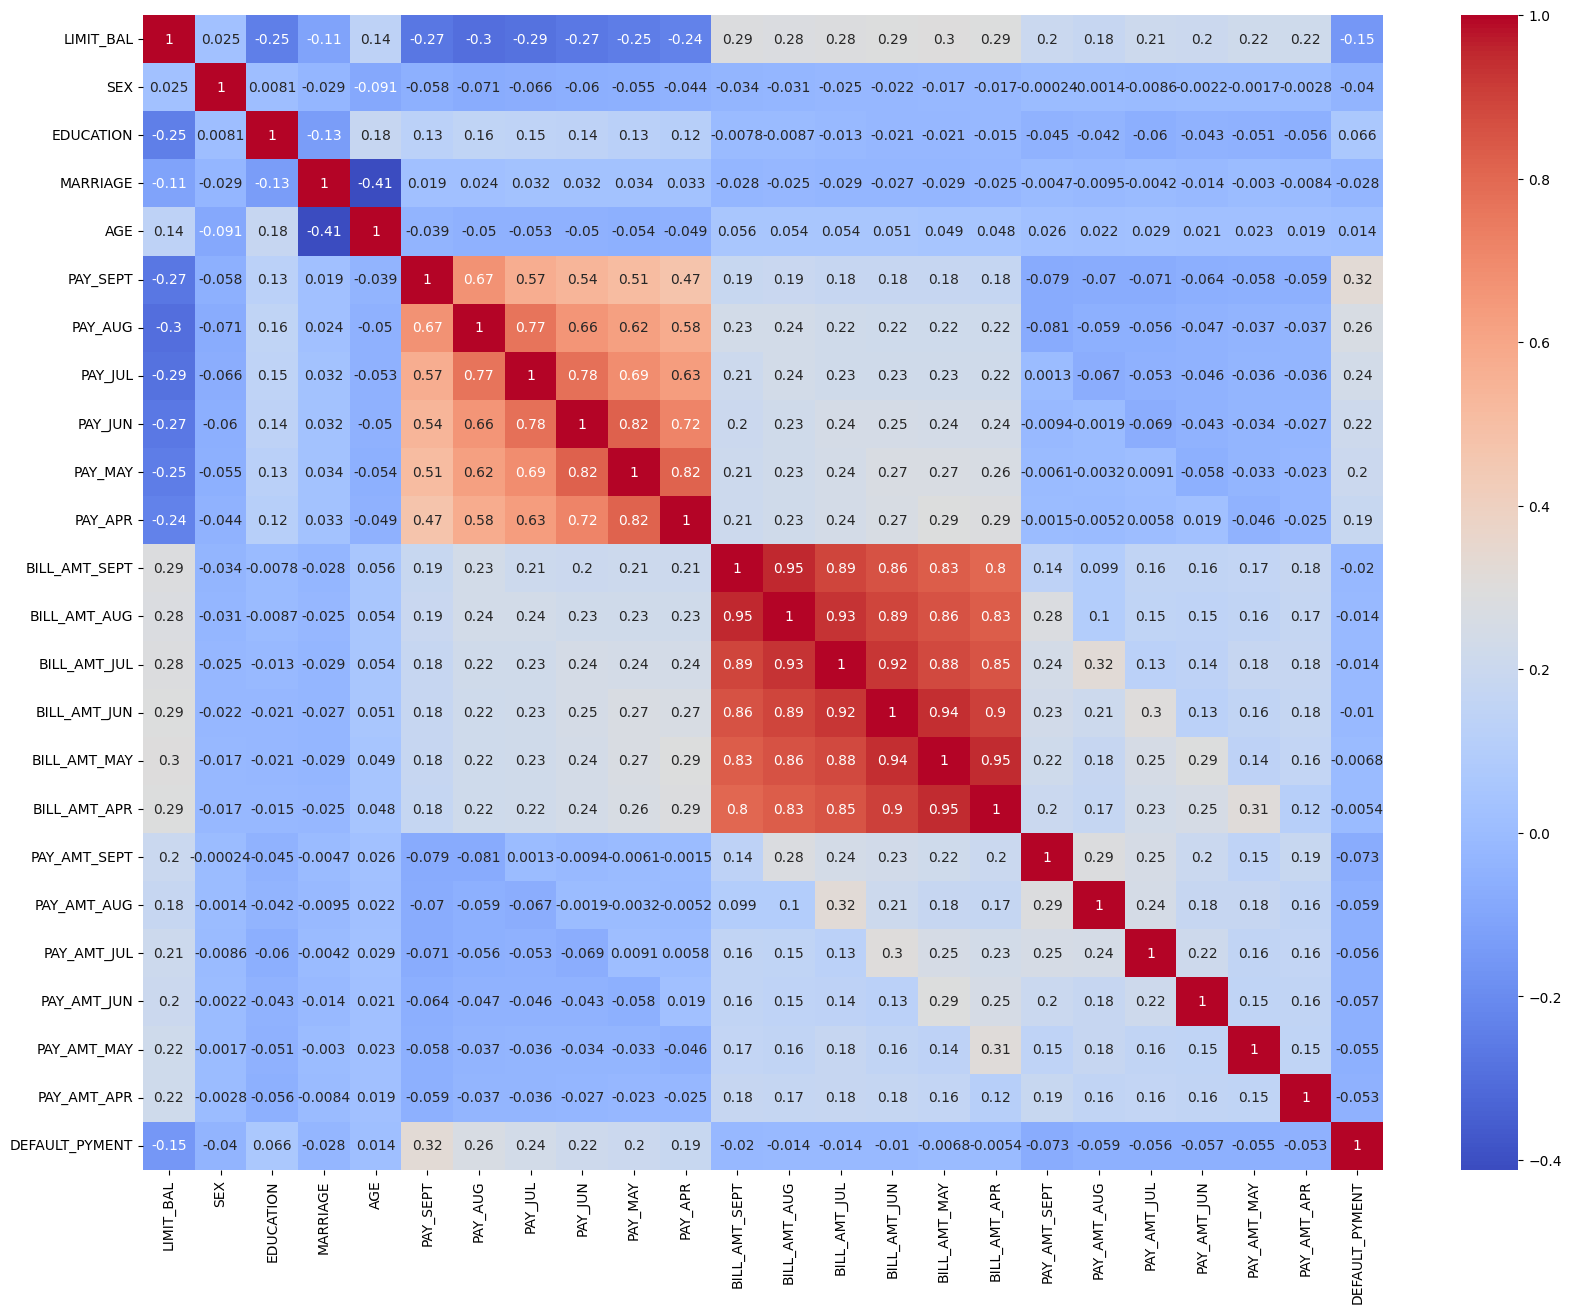

In [31]:
#plotting the heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(credit_df.corr(),annot=True,cmap="coolwarm")

* ***It seems from the above graph is there are some negatively correlated feature like age but we cannot blindly remove this feature because it could be important feature for prediction.*** 

In [32]:
credit_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT_PYMENT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [34]:
# Separate features and target variable
X= credit_df.drop(columns = 'DEFAULT_PYMENT') #input
y= credit_df['DEFAULT_PYMENT'] #output

In [35]:
X.shape,y.shape

((30000, 23), (30000,))

In [56]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 23)
(6000, 23)
(24000,)
(6000,)


In [58]:
#logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.70      0.23      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



In [42]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[3207 1457]
 [1641 3041]]


In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

Decisiontree = DecisionTreeClassifier()

k=5
kf = KFold(n_splits=k, shuffle=True, random_state=42) 
scores = cross_val_score(Decisiontree, X, y, cv=kf, scoring='accuracy')

for fold, score in enumerate(scores):
    print(f"Fold {fold+1}: Accuracy = {score:.2f}")
    
mean_accuracy = np.mean(scores)
print(f"Mean Accuracy ={mean_accuracy:.2f}")

report = classification_report(y_test, y_pred)
print(report)

Fold 1: Accuracy = 0.73
Fold 2: Accuracy = 0.72
Fold 3: Accuracy = 0.73
Fold 4: Accuracy = 0.72
Fold 5: Accuracy = 0.72
Mean Accuracy =0.72
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.70      0.23      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



In [60]:
from sklearn.naive_bayes import GaussianNB
Naivebayes = GaussianNB()

Naivebayes.fit(X_train_scaled, y_train)
y_pred2 = Naivebayes.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy: ", accuracy)

report = classification_report(y_test, y_pred)
print(report)

Accuracy:  0.7075
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.70      0.23      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)

knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled,y_test)


0.7815

In [46]:
performance_test_data = accuracy_score(y_test, y_pred) #orignal , predicted
performance_test_data

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.69      0.67      4664
           1       0.68      0.65      0.66      4682

    accuracy                           0.67      9346
   macro avg       0.67      0.67      0.67      9346
weighted avg       0.67      0.67      0.67      9346



In [62]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.8166666666666667
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4687
           1       0.68      0.30      0.42      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.63      0.66      6000
weighted avg       0.80      0.82      0.79      6000



In [63]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.8115
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.62      0.36      0.46      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



In [64]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

Accuracy: 0.8185
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.33      0.44      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.64      0.67      6000
weighted avg       0.80      0.82      0.79      6000



After fit the all classifire model, the Support Vector Classifier (SVC) appears to be the best model for predicting default credit card clients. It achieved the highest accuracy among all models and showed balanced precision, recall, and F1-score for both classes, indicating robust performance in predicting defaulted credit cards. Additionally, SVC showed higher precision, recall, and F1-score for class 1 compared to logistic regression and GaussianNB, making it a suitable choice for this task.

Therefore, the SVC model is recommended for predicting default credit card clients due to its high accuracy and balanced performance metrics.